# 5.2 Defining interventions

In this tutorial, you will learn how to add interventions to Starsim.

Here, we will define a vaccine intervention that is applied at a single point in time (`timestep`) that increases the immunity of a random subset of agents (`prob`) by a certain amount (`imm_boost`).

Initializing sim with 10000 agents
  Running 0.0 ( 0/51) (0.02 s)  ———————————————————— 2%
  Running 10.0 (10/51) (0.07 s)  ••••———————————————— 22%
  Running 20.0 (20/51) (0.11 s)  ••••••••———————————— 41%
  Running 30.0 (30/51) (0.15 s)  ••••••••••••———————— 61%
  Running 40.0 (40/51) (0.19 s)  ••••••••••••••••———— 80%
  Running 50.0 (50/51) (0.23 s)  •••••••••••••••••••• 100%

Initializing sim with 10000 agents
  Running 0.0 ( 0/51) (0.01 s)  ———————————————————— 2%
  Running 10.0 (10/51) (0.04 s)  ••••———————————————— 22%
  Running 20.0 (20/51) (0.08 s)  ••••••••———————————— 41%
  Running 30.0 (30/51) (0.12 s)  ••••••••••••———————— 61%
  Running 40.0 (40/51) (0.16 s)  ••••••••••••••••———— 80%
  Running 50.0 (50/51) (0.20 s)  •••••••••••••••••••• 100%



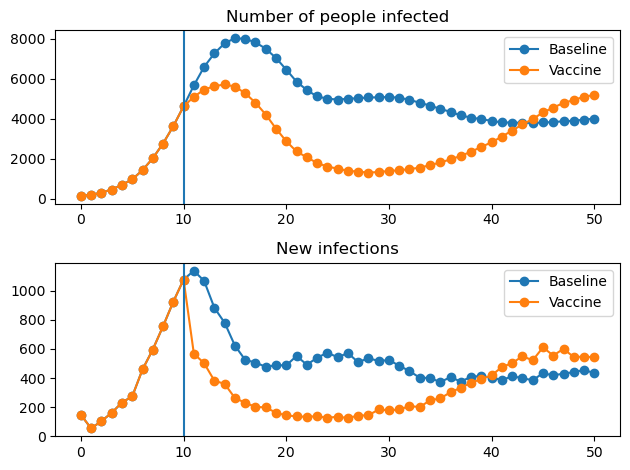

In [83]:
"""
An example of an SIS model with a vaccine intervention
"""

import numpy as np # Math
import sciris as sc # Utilities
import pylab as pl # Plotting
import starsim as ss # ABM
import pandas as pd

# for using r ggplot syntax for plotting
from plotnine import *
import matplotlib.pyplot as plt

class Vaccine(ss.Intervention): # Create a new, generic vaccine intervention
    
    def __init__(self, timestep=10, prob=0.5, imm_boost=2.0):
        super().__init__() # Initialize the intervention
        self.timestep = timestep # Store the timestep the vaccine is applied on
        self.prob = prob # Store the probability of vaccination
        self.imm_boost = imm_boost # Store the amount by which immunity is boosted
    
    def apply(self, sim): # Apply the vaccine
        if sim.ti == self.timestep: # Only apply on the matching timestep
            eligible_ids = sim.people.uid # Assume everyone is eligible
            n_eligible = len(eligible_ids) # Number of people who are eligible
            to_vaccinate = self.prob > np.random.rand(n_eligible) # Define which of the n_eligible people get vaccinated by comparing np.random.rand() to self.p
            vaccine_ids = eligible_ids[to_vaccinate] # Pull out the IDs for the people receiving the vaccine
            immunity = sim.diseases.sis.immunity # Shorten the name of the immunity
            immunity[vaccine_ids] += self.imm_boost # Modify the immunity by adding "boost" to the current immunity


def make_run_sim(timestep=10, prob=0.5, imm_boost=2.0): # Create and run the simulation

    vaccine = Vaccine(timestep=timestep, prob=prob, imm_boost=imm_boost) # Create the specific vaccine object
    pars = dict(start=0, end=50, dt=1.0, diseases='sis', networks='random') # Define the parameters of the simulation
    
    # Define "baseline" and "intervention" sims without and with the vaccine
    baseline_sim = ss.Sim(pars)
    vaccine_sim = ss.Sim(pars, interventions=vaccine)
    
    # Run the two simulations
    baseline_sim.run()
    vaccine_sim.run()

    # Pull out results to plot
    time = baseline_sim.yearvec
    baseline_results = baseline_sim.results.sis
    vaccine_results = vaccine_sim.results.sis
    n_infected_baseline = baseline_results.n_infected
    n_infected_vaccine = vaccine_results.n_infected
    new_infections_baseline = baseline_results.new_infections
    new_infections_vaccine = vaccine_results.new_infections
    
    # Create the figure
    pl.figure()
    
    # Plot number of people infected
    pl.subplot(2,1,1) # Create the first panel in the plot
    pl.title('Number of people infected')
    pl.plot(time, n_infected_baseline, 'o-', label='Baseline') # Plot baseline
    pl.plot(time, n_infected_vaccine, 'o-', label='Vaccine') # Plot vaccine
    pl.axvline(time[vaccine.timestep]) # Plot a vertical line to show when the vaccine was applied
    pl.legend()
    
    # Plot number of new infections
    pl.subplot(2,1,2) # Create the second panel in the plot
    pl.title('New infections')
    pl.plot(time, new_infections_baseline, 'o-', label='Baseline') # Plot baseline
    pl.plot(time, new_infections_vaccine, 'o-', label='Vaccine') # Plot vaccine
    pl.axvline(time[vaccine.timestep]) # Plot a vertical line to show when the vaccine was applied
    pl.legend()

    sc.figlayout()
    pl.show()



# this is  a modified function similar to make_run_sim, 
    #however instead of returning a plot it retusn the data used to plot
    
def make_get_data(timestep=10, prob=0.5, imm_boost=2.0): # Create and run the simulation

    vaccine = Vaccine(timestep=timestep, prob=prob, imm_boost=imm_boost) # Create the specific vaccine object
    pars = dict(start=0, end=50, dt=1.0, diseases='sis', networks='random') # Define the parameters of the simulation
    
    # Define "baseline" and "intervention" sims without and with the vaccine
    baseline_sim = ss.Sim(pars)
    vaccine_sim = ss.Sim(pars, interventions=vaccine)
    
    # Run the two simulations
    baseline_sim.run()
    vaccine_sim.run()

        # Pull out results to plot
    time = baseline_sim.yearvec
    baseline_results = baseline_sim.results.sis
    vaccine_results = vaccine_sim.results.sis
    n_infected_baseline = baseline_results.n_infected
    n_infected_vaccine = vaccine_results.n_infected
    new_infections_baseline = baseline_results.new_infections
    new_infections_vaccine = vaccine_results.new_infections

    # Create the dataframe
    df = pd.DataFrame({
        'Time': time,
        'N_Infected_Baseline': n_infected_baseline,
        'N_Infected_Vaccine': n_infected_vaccine,
        'New_Infections_Baseline': new_infections_baseline,
        'New_Infections_Vaccine': new_infections_vaccine
    })

    return(df)



    
# Make, run, and plot the simulation
make_run_sim()

## Problem 1

Confirm that with `prob=1.0` and a large boost, that all transmission stops.

## Solution 1

Initializing sim with 10000 agents
  Running 0.0 ( 0/51) (0.02 s)  ———————————————————— 2%
  Running 10.0 (10/51) (0.06 s)  ••••———————————————— 22%
  Running 20.0 (20/51) (0.11 s)  ••••••••———————————— 41%
  Running 30.0 (30/51) (0.15 s)  ••••••••••••———————— 61%
  Running 40.0 (40/51) (0.18 s)  ••••••••••••••••———— 80%
  Running 50.0 (50/51) (0.22 s)  •••••••••••••••••••• 100%

Initializing sim with 10000 agents
  Running 0.0 ( 0/51) (0.01 s)  ———————————————————— 2%
  Running 10.0 (10/51) (0.05 s)  ••••———————————————— 22%
  Running 20.0 (20/51) (0.08 s)  ••••••••———————————— 41%
  Running 30.0 (30/51) (0.11 s)  ••••••••••••———————— 61%
  Running 40.0 (40/51) (0.15 s)  ••••••••••••••••———— 80%
  Running 50.0 (50/51) (0.19 s)  •••••••••••••••••••• 100%



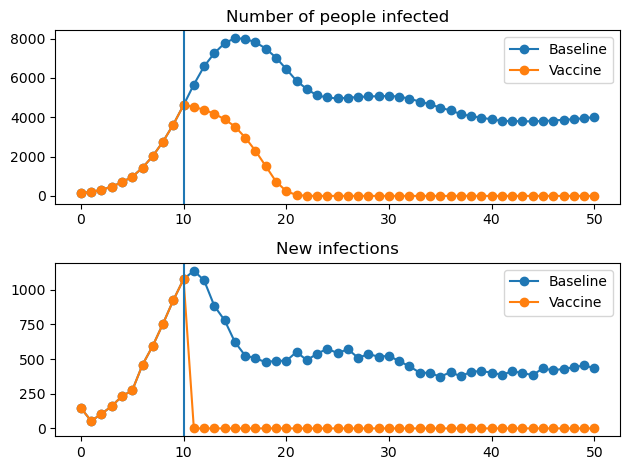

In [5]:
make_run_sim(prob=1.0, imm_boost=100)

## Problem 2

How do changes in `prob` and `imm_boost` affect the results?

## Solution 2

(Note: these are examples, other parameter values should also be checked.)

Initializing sim with 10000 agents
  Running 0.0 ( 0/51) (0.02 s)  ———————————————————— 2%
  Running 10.0 (10/51) (0.07 s)  ••••———————————————— 22%
  Running 20.0 (20/51) (0.11 s)  ••••••••———————————— 41%
  Running 30.0 (30/51) (0.14 s)  ••••••••••••———————— 61%
  Running 40.0 (40/51) (0.18 s)  ••••••••••••••••———— 80%
  Running 50.0 (50/51) (0.21 s)  •••••••••••••••••••• 100%

Initializing sim with 10000 agents
  Running 0.0 ( 0/51) (0.01 s)  ———————————————————— 2%
  Running 10.0 (10/51) (0.04 s)  ••••———————————————— 22%
  Running 20.0 (20/51) (0.08 s)  ••••••••———————————— 41%
  Running 30.0 (30/51) (0.11 s)  ••••••••••••———————— 61%
  Running 40.0 (40/51) (0.15 s)  ••••••••••••••••———— 80%
  Running 50.0 (50/51) (0.18 s)  •••••••••••••••••••• 100%



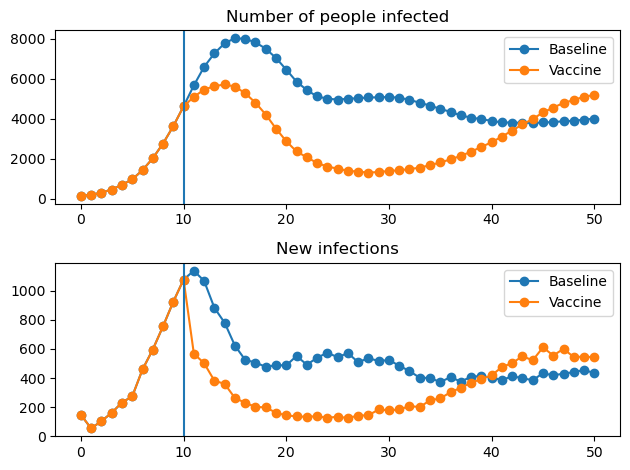

Initializing sim with 10000 agents
  Running 0.0 ( 0/51) (0.01 s)  ———————————————————— 2%
  Running 10.0 (10/51) (0.05 s)  ••••———————————————— 22%
  Running 20.0 (20/51) (0.10 s)  ••••••••———————————— 41%
  Running 30.0 (30/51) (0.14 s)  ••••••••••••———————— 61%
  Running 40.0 (40/51) (0.18 s)  ••••••••••••••••———— 80%
  Running 50.0 (50/51) (0.21 s)  •••••••••••••••••••• 100%

Initializing sim with 10000 agents
  Running 0.0 ( 0/51) (0.01 s)  ———————————————————— 2%
  Running 10.0 (10/51) (0.04 s)  ••••———————————————— 22%
  Running 20.0 (20/51) (0.07 s)  ••••••••———————————— 41%
  Running 30.0 (30/51) (0.11 s)  ••••••••••••———————— 61%
  Running 40.0 (40/51) (0.15 s)  ••••••••••••••••———— 80%
  Running 50.0 (50/51) (0.19 s)  •••••••••••••••••••• 100%



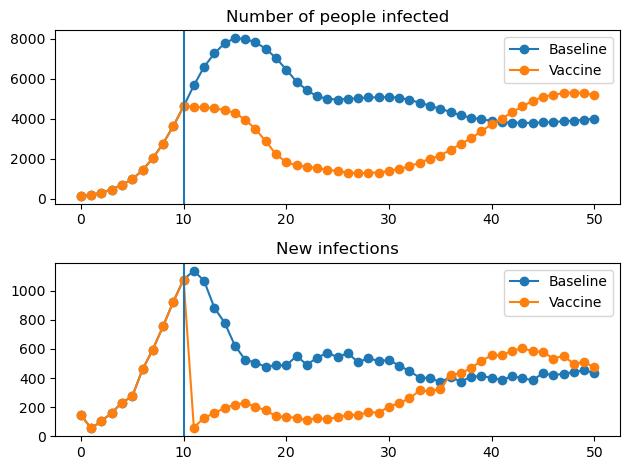

In [7]:
aa = make_run_sim(prob=0.5, imm_boost=2.0)
make_run_sim(prob=1.0, imm_boost=1.0)

# LOOPING OVER THE PARAMETER SPACE

Instead of trying two pairs of parameters e.g. (prob = .3, imm = 2) | (prob = .3, imm = 3),

We may be interested in seeing a wide range of parameter combinations. An effective way of doing this is:

1. create a vector of possible parameter values for every parameter:

    ```prob = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]```

    ```imm = [1, 2, 3, 4, 5]```

2. For every element in prob and in imm, compute a measure of interest from the simulation. For this simulation, we care about:

    - (shock) - the sudden drop in new infections following a vaccine. This is important for us to see the immediate effect of the vaccine
    - (time_exceed) - The number of days it takes for the vaccinated new_infections to actually touch th baseline new_infectoins. This gives us an idea of the sustained effect of the vaccine.

This is easily achieved using a nested for loop as shown below:

In [85]:
prob_vec = np.linspace(0, 1, 20)
imm_boost = [1, 2, 3, 4, 5]
data = []

for p in prob_vec:
    for i in imm_boost:
        print(p)
        print(i)
        aa = make_get_data(prob=p, imm_boost=i)

        value_at_time_10 = aa.loc[aa['Time'] == 10, 'New_Infections_Vaccine'].iloc[0]
        value_at_time_11 = aa.loc[aa['Time'] == 11, 'New_Infections_Vaccine'].iloc[0]
        shock = value_at_time_10 - value_at_time_11

        try:
            tex = aa[aa['New_Infections_Vaccine'] > aa['New_Infections_Baseline']]['Time'].iloc[0]
        except:
            tex = 0
        print(tex)
        data.append([p, i, tex, shock])



0.0
1
Initializing sim with 10000 agents
  Running 0.0 ( 0/51) (0.02 s)  ———————————————————— 2%
  Running 10.0 (10/51) (0.08 s)  ••••———————————————— 22%
  Running 20.0 (20/51) (0.12 s)  ••••••••———————————— 41%
  Running 30.0 (30/51) (0.15 s)  ••••••••••••———————— 61%
  Running 40.0 (40/51) (0.19 s)  ••••••••••••••••———— 80%
  Running 50.0 (50/51) (0.23 s)  •••••••••••••••••••• 100%

Initializing sim with 10000 agents
  Running 0.0 ( 0/51) (0.01 s)  ———————————————————— 2%
  Running 10.0 (10/51) (0.05 s)  ••••———————————————— 22%
  Running 20.0 (20/51) (0.09 s)  ••••••••———————————— 41%
  Running 30.0 (30/51) (0.12 s)  ••••••••••••———————— 61%
  Running 40.0 (40/51) (0.16 s)  ••••••••••••••••———— 80%
  Running 50.0 (50/51) (0.20 s)  •••••••••••••••••••• 100%

0
0.0
2
Initializing sim with 10000 agents
  Running 0.0 ( 0/51) (0.01 s)  ———————————————————— 2%
  Running 10.0 (10/51) (0.05 s)  ••••———————————————— 22%
  Running 20.0 (20/51) (0.08 s)  ••••••••———————————— 41%
  Running 30.

In [90]:
exceedance = df = pd.DataFrame(data, columns=['prob', 'imm', 'time_exceed', 'shock'])
exceedance['time_exceed'] = exceedance['time_exceed'] - 10
#exceedance['time_exceed'] = exceedance['time_exceed'].replace(0, None)

# Time for vaccinated (new_infections) to be similar to baseline(new_infections)

As shown, we see an interaction between the two parameters (prob and imm). Generally higher values of imm and prob, are associated with higher timepoints it takes for the vaccine effect to wear off.

The purple color of the graph means, for that parameter combination, vaccine new_infections never cross paths with the baselines (think about 100% probability of vaccinations with an immunity boost of 5.)

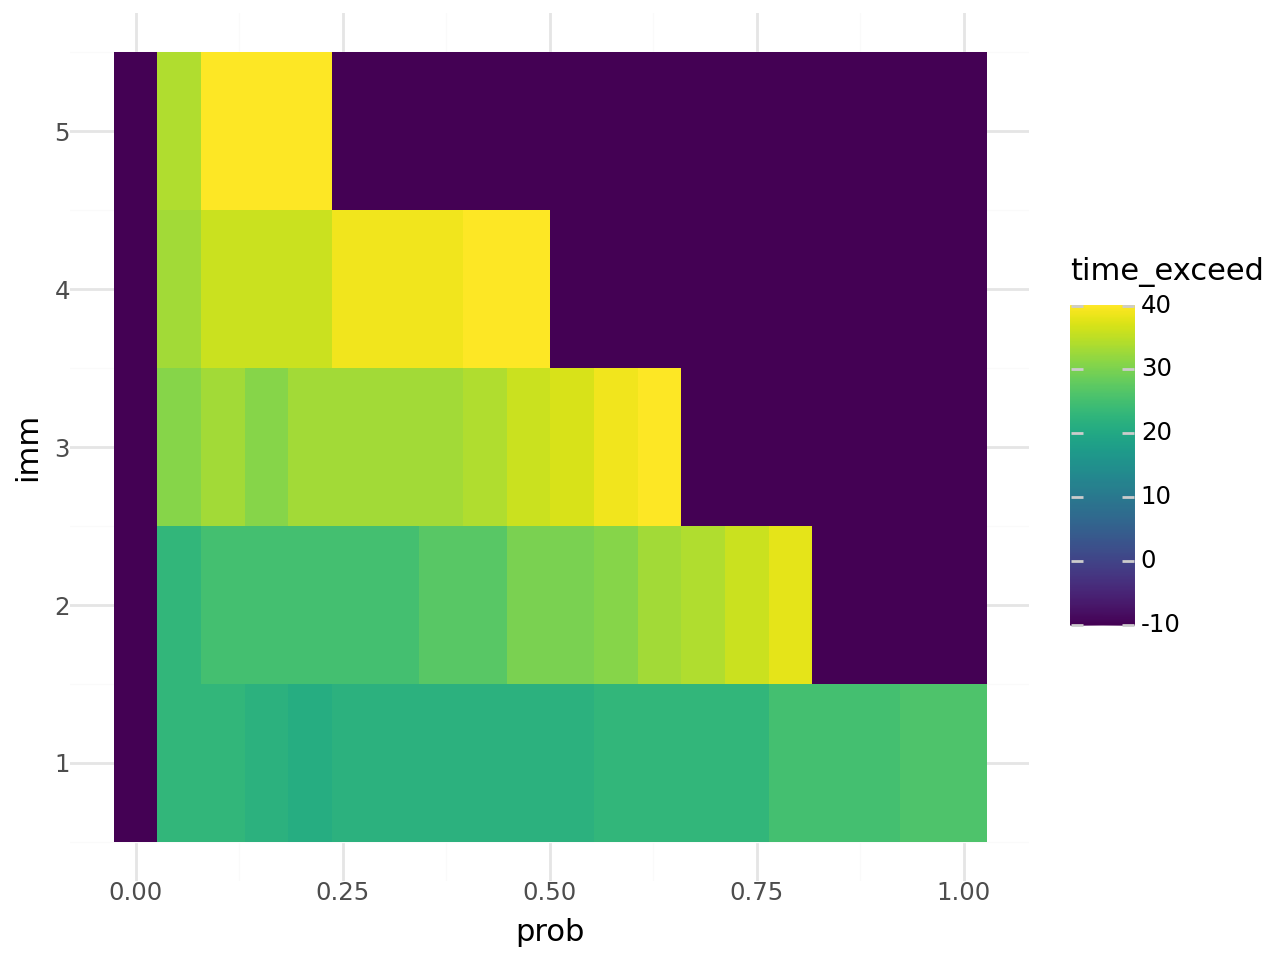

In [91]:
(
    ggplot(data = exceedance) +
    geom_raster(aes('prob', 'imm', fill = 'time_exceed'))+
    theme_minimal()
)


# Immediate effect of the vaccine

As shown, we see NO interaction between the two parameters (prob and imm). Generally higher values of prob, are associated with higher shocks, regardless of the immunity boost value.

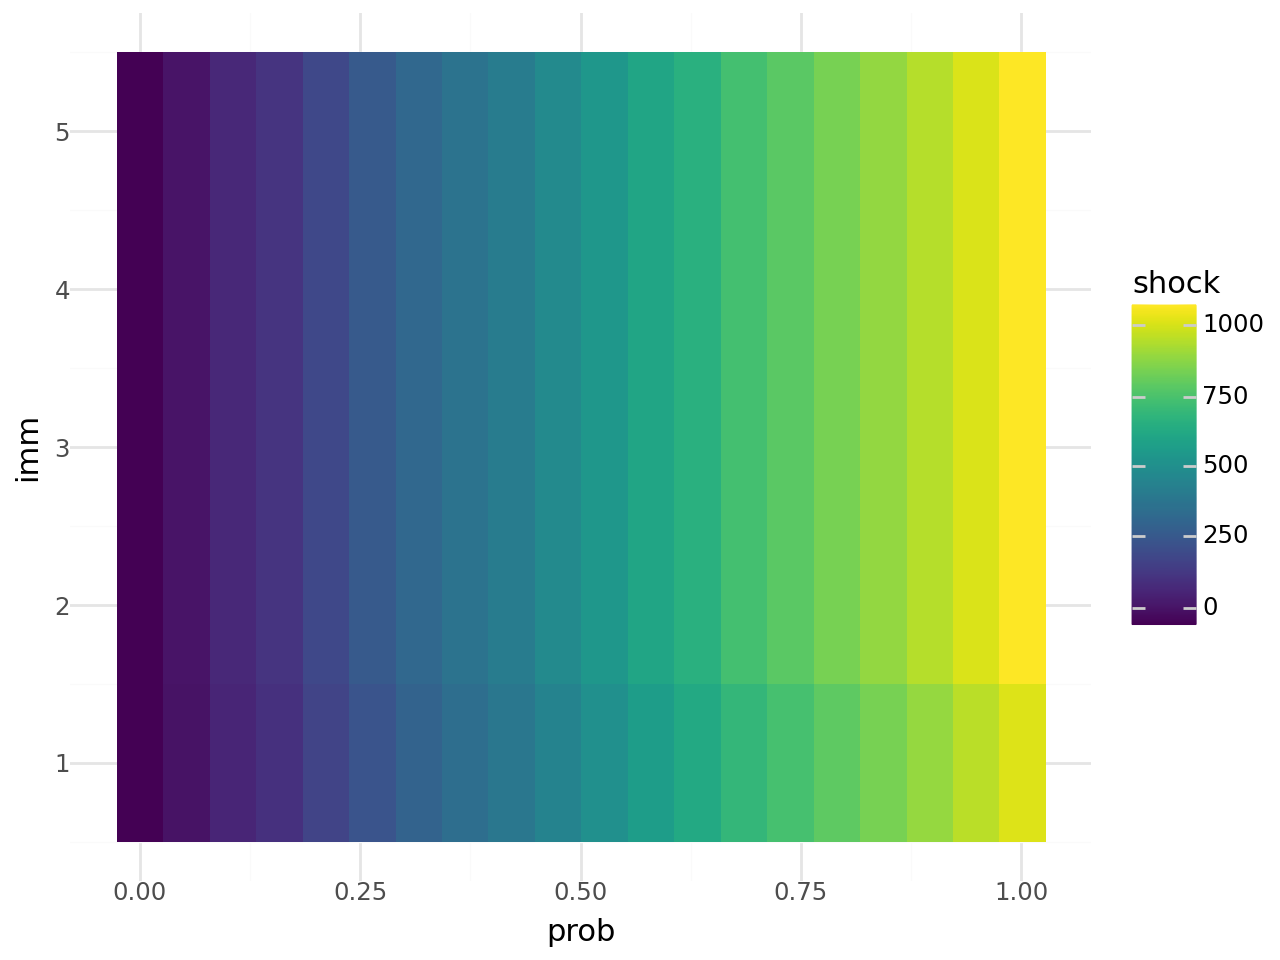

In [88]:
(
    ggplot(data = exceedance) +
    geom_raster(aes('prob', 'imm', fill = 'shock'))+
    theme_minimal()
)